In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./datasets/preprocessed.csv')
df.fillna('', inplace=True)
df

,role,company_name,company_location,company_rating,job_type,description,job_location,company_state,min_salary,max_salary
0,Data Analyst II - Trust & Safety,Pinterest,San Francisco,3.8,,About Pinterest:\n Millions of people across t...,Remote,CA,0.0,0.0
1,Data Scientist – Learning Analytics,MIT,Cambridge,4.2,Full-time,"DATA SCIENTIST, LEARNING ANALYTICS, MIT Open L...",On-site,MA,110000.0,125000.0
2,Data Analyst,"GitHub, Inc.",,4.1,Full-time,About GitHub: As the global home for all devel...,Remote,,73500.0,195000.0
3,Missouri Online Data Analyst I - Remote and Hy...,University of Missouri,Missouri,4.1,Full-time,Hiring Department\n\n\n\n\n\neLearning\n\n\n\n...,Remote,,60000.0,69000.0
4,Data Analyst,Everside Health,,3.0,Full-time,ABOUT THE JOB\n \n\n The Data Analyst is res...,Remote,,75000.0,85000.0
...,...,...,...,...,...,...,...,...,...,...
1058,Data Analyst,Truepill,,2.6,Full-time,"Description \nAt Truepill, we power the future...",Remote,,90000.0,130000.0
1059,Senior Data Analyst,ServiceNow,San Diego,3.8,Full-time,"Company Description\n At ServiceNow, our techn...",Remote,CA,84870.0,140130.0
1060,Health Data Analyst,Blue Cross and Blue Shield of Nebraska (BCBSNE),Omaha,3.9,,Blue Cross and Blue Shield of Nebraska (BCBSNE...,Hybrid remote,NE,0.0,0.0
1061,Data Scientist,Key Cyber Solutions,Richmond,0.0,Part-time,Company Description\n Key Cyber Solutions (KCS...,On-site,VA,0.0,0.0


In [4]:
df.describe()

,company_rating,min_salary,max_salary
count,1063.000000,1063.000000,1063.000000
mean,3.121731,45165.715898,72453.813170
std,1.439151,53623.455456,84017.371087
min,0.000000,0.000000,0.000000
25%,3.100000,0.000000,0.000000
50%,3.600000,0.000000,60000.000000
75%,4.000000,84000.000000,130000.000000
max,5.000000,218400.000000,585000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   role              1063 non-null   object 
 1   company_name      1063 non-null   object 
 2   company_location  1063 non-null   object 
 3   company_rating    1063 non-null   float64
 4   job_type          1063 non-null   object 
 5   description       1063 non-null   object 
 6   job_location      1063 non-null   object 
 7   company_state     1063 non-null   object 
 8   min_salary        1063 non-null   float64
 9   max_salary        1063 non-null   float64
dtypes: float64(3), object(7)
memory usage: 83.2+ KB


In [6]:
df.isnull().sum()

role                0
company_name        0
company_location    0
company_rating      0
job_type            0
description         0
job_location        0
company_state       0
min_salary          0
max_salary          0
dtype: int64

### Role
1. What is the distribution of each role?
2. How many Juniors or Seniors are explicitly asked for by each role?

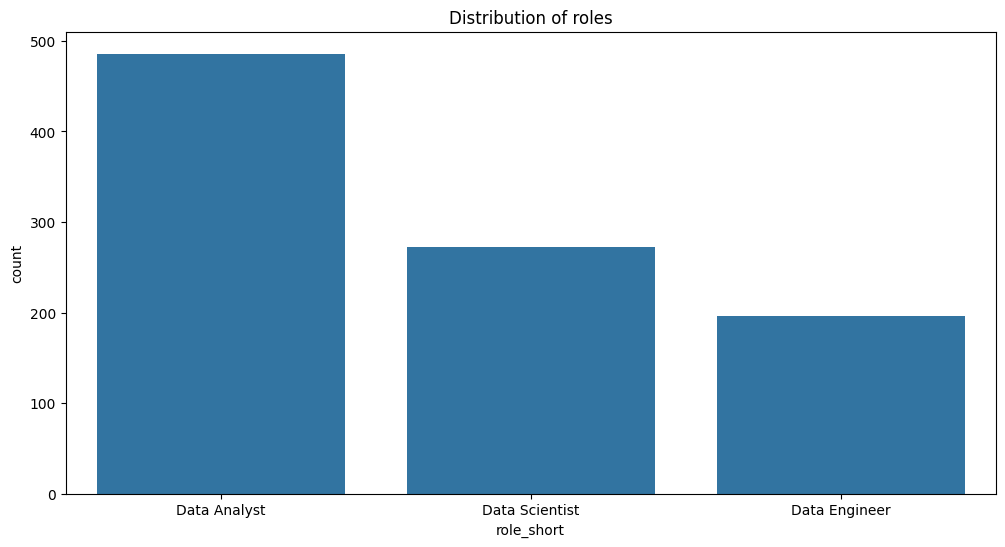

,role_short,junior_count,senior_count
0,Data Analyst,5,33
1,Data Engineer,4,32
2,Data Scientist,1,26


In [29]:
# Compute new role indicating whether the role is Data Analyst, Engineer or Scientist
roles = ['Data Analyst', 'Data Scientist','Data Engineer']
pat = '|'.join(roles)
s = df['role'].str.extract('('+ pat + ')', expand=False)
df['role_short'] = df['role'].str.extract('('+ pat + ')', expand=False)

# 1. Distribution of roles
plt.figure(figsize=(12, 6))
sns.countplot(x='role_short', data=df)
plt.title('Distribution of roles')
plt.show()

# 2. Explicitly asking for Juniors or Seniors
role_explicit = pd.DataFrame(df['role_short'].copy())
role_explicit['junior_count'] = df['role'].str.lower().str.contains('junior')
role_explicit['senior_count'] = df['role'].str.lower().str.contains('senior')
role_explicit.groupby('role_short').agg({'junior_count': 'sum', 'senior_count': 'sum'}).reset_index()

### Company location
1. What are the top 5 represented locations?

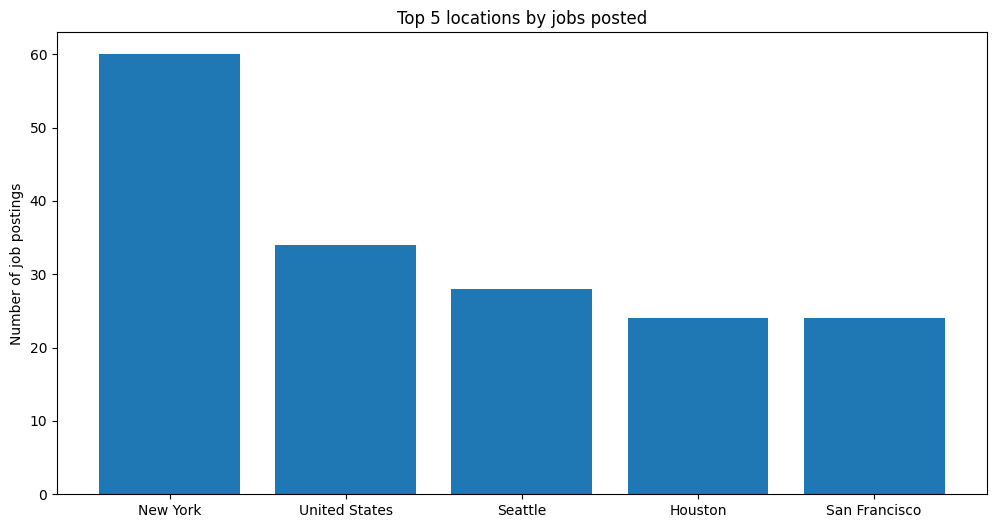

In [28]:
# top 5 locations by count
top_company_locations = df[df['company_location'] != ''].groupby('company_location').size().reset_index(name='Count').sort_values('Count', ascending=False).head(5).copy()

plt.figure(figsize=(12, 6))
plt.bar(top_company_locations['company_location'], top_company_locations['Count'])
plt.title('Top 5 locations by jobs posted')
plt.ylabel('Number of job postings')
plt.show()

### Job location
1. What is the distribution of job locations?
2. How does the distribution of job locations vary for different roles?

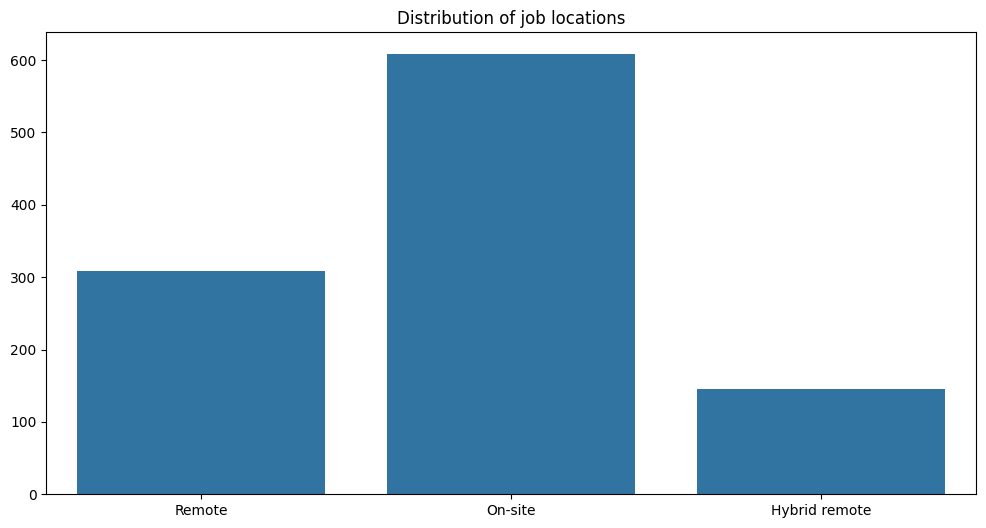

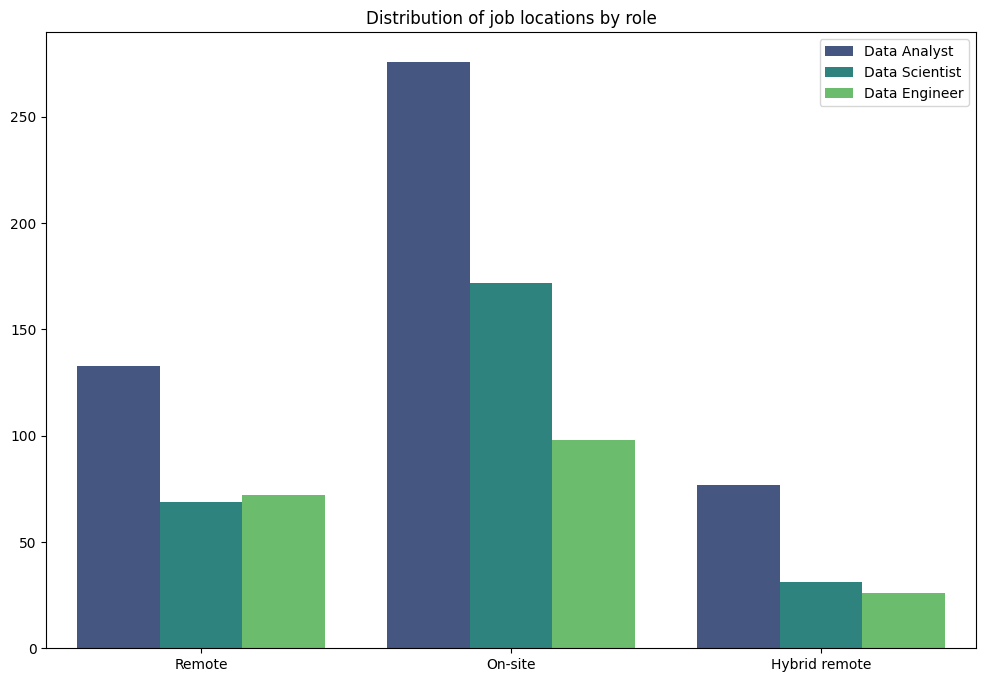

In [26]:
# 1. Distribution of job locations
plt.figure(figsize=(12, 6))
sns.countplot(x='job_location', data=df)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Distribution of job locations')
plt.show()

# 2. Distribution of job locations for different roles
plt.figure(figsize=(12, 8))
sns.countplot(x='job_location', hue='role_short', data=df, palette='viridis')
plt.title('Distribution of job locations by role')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Job type
1. How many Full-time, Part-time and Contract jobs are there for each role?

<Axes: xlabel='role_short'>

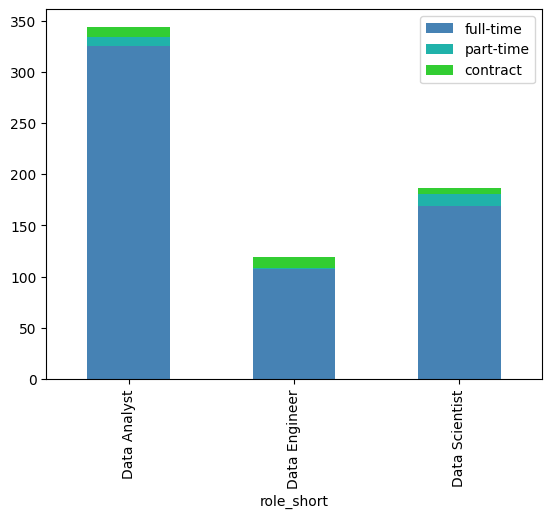

In [32]:
df_job_types = df[['role_short']].copy()
df_job_types['full-time'] = df['job_type'].str.lower().str.contains('full-time')
df_job_types['part-time'] = df['job_type'].str.lower().str.contains('part-time')
df_job_types['contract'] = df['job_type'].str.lower().str.contains('contract')

df_job_types = df_job_types.groupby('role_short').agg({'full-time': 'sum', 'part-time': 'sum', 'contract': 'sum'}).reset_index()
df_job_types.plot(kind='bar', stacked=True, x='role_short', color=['steelblue', 'lightseagreen', 'limegreen'])

### Company ratings
1. What are mean, max and min company ratings?
2. Which companies have the minimum/maximum rating?
3. What is the distribution of the ratings?

Average company rating: 3.12 
Highest company rating: 5.00 
Lowest company rating: 1.00 

Companies with lowest rating: ['Eagleforce Associates']
Companies with highest rating: ['Dutech Systems', 'Railroad19', 'Eventellect', 'Pattern', 'Trinisys', 'EdPlus at Arizona State University']



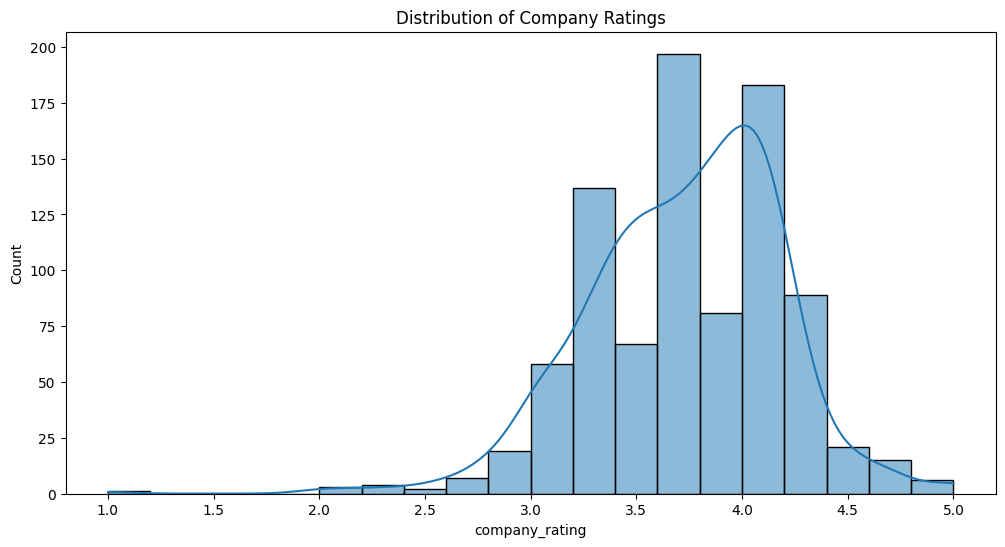

In [33]:
# 1. mean, max, min
avg_rating = df['company_rating'].aggregate('mean')
max_rating = df['company_rating'].aggregate('max')
min_rating = df[df['company_rating'] != 0.0]['company_rating'].aggregate('min')

# 2. companies that have a highest rating
highest_rated = df[df['company_rating'] == max_rating]['company_name'].values.tolist()

# 2. companies that have a lowest rating (exclude companies with rating of 0)
lowest_rated = df[df['company_rating'] == min_rating]['company_name'].values.tolist()

print("Average company rating: {:.2f} ".format(avg_rating))
print("Highest company rating: {:.2f} ".format(max_rating))
print("Lowest company rating: {:.2f} ".format(min_rating))
print(f"\nCompanies with lowest rating: {lowest_rated}")
print(f"Companies with highest rating: {highest_rated}\n")

# 3. Distribution of company ratings
plt.figure(figsize=(12, 6))
sns.histplot(df[df['company_rating'] != 0]['company_rating'], bins=20, kde=True)
plt.title('Distribution of Company Ratings')
plt.show()


### Salary
1. What are min, max and mean salary for each role?
2. Plot the distribution of salary for each role
3. What is the correlation between salary buckets and job location?
4. What is the average salary for different company rating buckets?

                min_salary  max_salary     avg_salary
role_short                                           
Data Analyst       24324.0    370500.0   98989.690509
Data Engineer      55200.0    353600.0  142186.359082
Data Scientist     46696.0    395280.0  145268.213740


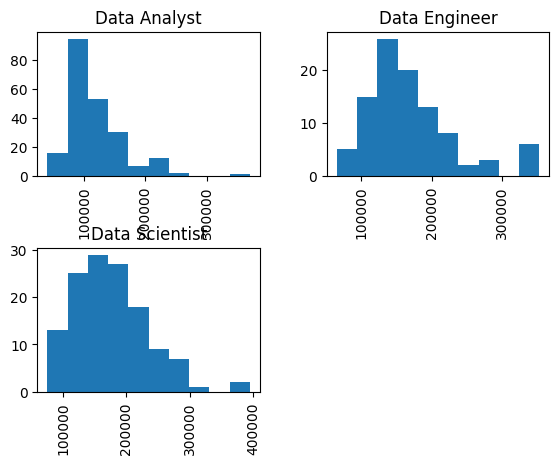

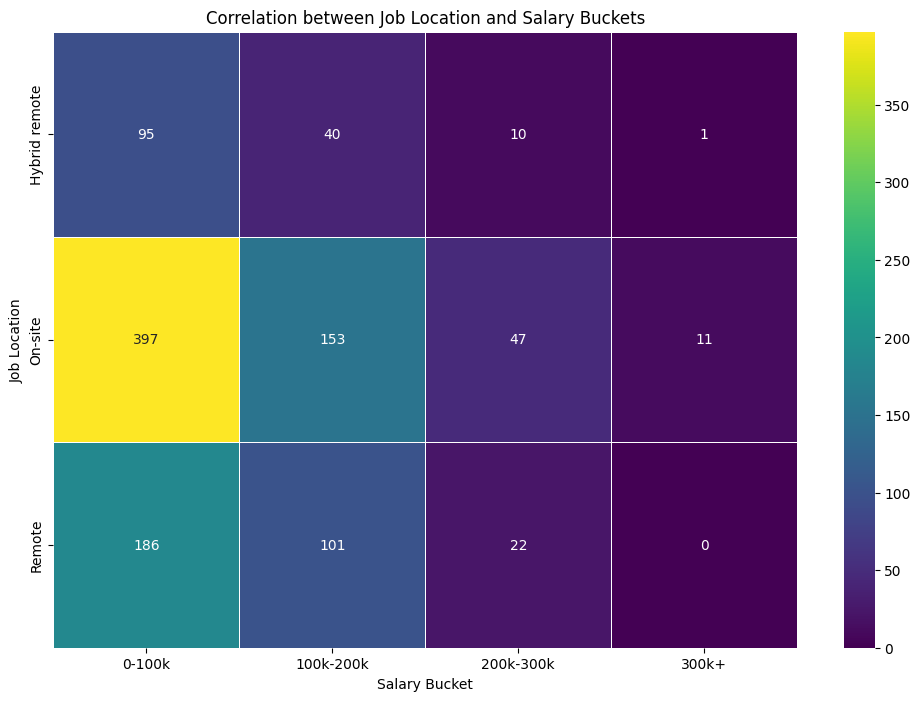

/tmp/ipykernel_1418/3403774950.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_salary_by_rating = df_rating.groupby('rating_bucket')['max_salary'].mean()


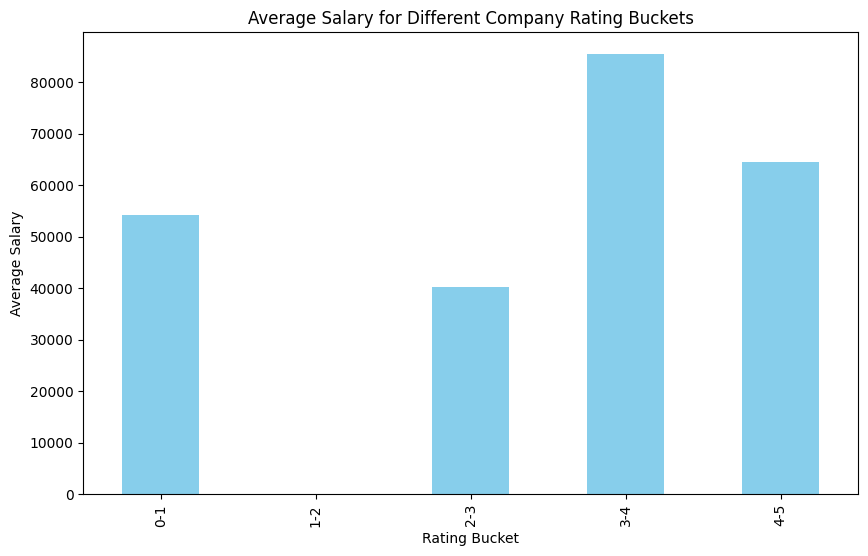

In [34]:
# 1. Min, max, avg
df_salary = df[['role_short', 'min_salary', 'max_salary']].copy()
df_salary['avg_salary'] = (df_salary['min_salary'] + df_salary['max_salary']) / 2 
print(df_salary[df_salary['min_salary'] != 0].groupby('role_short').agg({'min_salary': 'min', 'max_salary': 'max', 'avg_salary': 'mean'}))



# 2. salary distribution for each role
df[(df['max_salary'] != 0) & (df['min_salary'] != 0)].hist('max_salary', by='role_short')



# 3. salary(buckets) vs job location
salary_bins = [0, 100000, 200000, 300000, float('inf')]
salary_labels = ['0-100k', '100k-200k', '200k-300k', '300k+']

# Add a new column for salary buckets
df_salary_location = df[['job_location', 'max_salary']].copy()
df_salary_location['salary_bucket'] = pd.cut(df_salary_location['max_salary'], bins=salary_bins, labels=salary_labels, right=False)

pivot_df = df_salary_location.pivot_table(index='job_location', columns='salary_bucket', values='max_salary', aggfunc='count', fill_value=0)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='d', linewidths=0.5)
plt.title('Correlation between Job Location and Salary Buckets')
plt.xlabel('Salary Bucket')
plt.ylabel('Job Location')
plt.show()



# 4. Company Rating vs Salary buckets
rating_bins = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
rating_labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

# Add a new column to the DataFrame for rating buckets
df_rating = df[['company_rating', 'max_salary']].copy()
df_rating['rating_bucket'] = pd.cut(df_rating['company_rating'], bins=rating_bins, labels=rating_labels, right=False)

# Calculate the average salary for each rating bucket
average_salary_by_rating = df_rating.groupby('rating_bucket')['max_salary'].mean()

# Plot
plt.figure(figsize=(10, 6))
average_salary_by_rating.plot(kind='bar', color='skyblue')
plt.title('Average Salary for Different Company Rating Buckets')
plt.xlabel('Rating Bucket')
plt.ylabel('Average Salary')
plt.show()

### Description
1. Looking data engineers and scientist, which role ask explicitly for the knowledge of:
    - Python
    - Cloud technologies
    - Databases knowledge
    - SQL
    - machine learning

In [35]:
df_desc = df[df['role_short'] != 'Data Analyst'][['role_short', 'description']].copy()

# form pat for cloud technologies search
cloud = ['azure', 'aws', 'google cloud', 'gcp']
pat = '|'.join(cloud)

df_desc['python'] = df_desc['description'].str.lower().str.contains('python')
df_desc['cloud'] = df_desc['description'].str.lower().str.contains(pat)
df_desc['sql'] = df_desc['description'].str.lower().str.contains('sql')
df_desc['database'] = df_desc['description'].str.lower().str.contains('database')
df_desc['machine_learning'] = df_desc['description'].str.lower().str.contains('machine learning')

df_desc.groupby('role_short').agg('sum').reset_index()

,role_short,description,python,cloud,sql,database,machine_learning
0,Data Engineer,Position Information\n\n The Junior Data Engi...,132,132,158,123,35
1,Data Scientist,"DATA SCIENTIST, LEARNING ANALYTICS, MIT Open L...",221,91,159,86,185
